## EDA by Yunzhe Zhang

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Household Dataset


In [180]:
df = pd.read_csv('./data/household_data_60min_singleindex.csv')

In [181]:
df.head()
df.shape

(38454, 71)

In [182]:
# def to calculate the missing rate
def countMissRate(x,size):
    count = 0
    for values in x.items():
        count = count + values[1]
    return round(float((1- count/size) * 100),2)




In [183]:
temp1 = countMissRate(df[["DE_KN_residential1_dishwasher"]].value_counts(), df.shape[0]) + countMissRate(df[["DE_KN_residential2_dishwasher"]].value_counts(), df.shape[0]) + countMissRate(df[["DE_KN_residential3_dishwasher"]].value_counts(), df.shape[0]) + countMissRate(df[["DE_KN_residential4_dishwasher"]].value_counts(), df.shape[0]) + countMissRate(df[["DE_KN_residential5_dishwasher"]].value_counts(), df.shape[0]) + countMissRate(df[["DE_KN_residential6_dishwasher"]].value_counts(), df.shape[0])
print("Missing rate of dishwasher for 1,2,3,4,5,6 residential is " + str(round(temp1 / 6,2)) + "%")

temp2 = countMissRate(df[["DE_KN_residential1_washing_machine"]].value_counts(), df.shape[0]) + countMissRate(df[["DE_KN_residential2_washing_machine"]].value_counts(), df.shape[0]) + countMissRate(df[["DE_KN_residential3_washing_machine"]].value_counts(), df.shape[0]) + countMissRate(df[["DE_KN_residential4_washing_machine"]].value_counts(), df.shape[0]) + countMissRate(df[["DE_KN_residential5_washing_machine"]].value_counts(), df.shape[0]) 
print("Missing rate of washer machine for 1,2,3,4,5 residential is " + str(round(temp2 / 5,2)) + "%")

temp3 = countMissRate(df[["DE_KN_residential1_freezer"]].value_counts(), df.shape[0]) + countMissRate(df[["DE_KN_residential2_freezer"]].value_counts(), df.shape[0]) + countMissRate(df[["DE_KN_residential3_freezer"]].value_counts(), df.shape[0]) + countMissRate(df[["DE_KN_residential4_freezer"]].value_counts(), df.shape[0]) + countMissRate(df[["DE_KN_residential6_freezer"]].value_counts(), df.shape[0]) 
print("Missing rate of freezer for 1,2,3,4,6 residential is " + str(round(temp2 / 5,2)) + "%")



Missing rate of dishwasher for 1,2,3,4,5,6 residential is 50.46%
Missing rate of washer machine for 1,2,3,4,5 residential is 44.39%
Missing rate of freezer for 1,2,3,4,6 residential is 44.39%


In [186]:
def calpirechart(data, usage):
    result = []
    for each in usage:
        counts = data[[each]].value_counts()
        temp = 0
        for values in counts.items():
            temp = temp + values[0][0] * values[1] 
        result.append(int(temp))
    return result 

#### 1.2.1 Industrial section


Text(0.5, 1.0, 'industry 3')

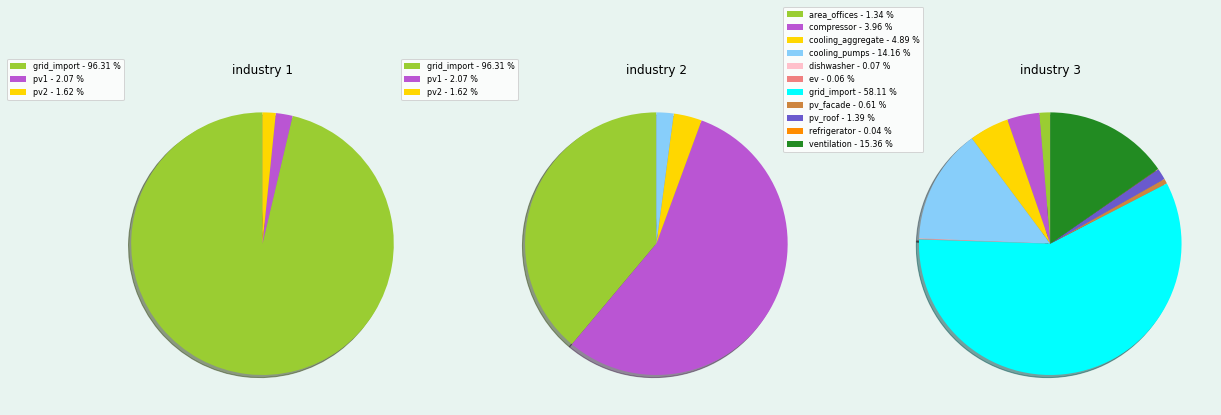

In [193]:
indus_1 = ["DE_KN_industrial1_grid_import", "DE_KN_industrial1_pv_1", "DE_KN_industrial1_pv_2"]
ind_1 = calpirechart(df, indus_1)
ind_labels1 = ["grid_import", "pv1", "pv2"]

indus_2 = ["DE_KN_industrial2_grid_import", "DE_KN_industrial2_pv", "DE_KN_industrial2_storage_charge", "DE_KN_industrial2_storage_decharge"]
ind_2 = calpirechart(df, indus_2)
ind_labels2 = ["grid_import", "pv", "storage_charge", "storage_decharge"]

indus_3 = ["DE_KN_industrial3_area_offices", "DE_KN_industrial3_compressor", "DE_KN_industrial3_cooling_aggregate", "DE_KN_industrial3_cooling_pumps", "DE_KN_industrial3_dishwasher", "DE_KN_industrial3_ev", "DE_KN_industrial3_grid_import","DE_KN_industrial3_pv_facade","DE_KN_industrial3_pv_roof", "DE_KN_industrial3_refrigerator", "DE_KN_industrial3_ventilation"]
ind_3= calpirechart(df, indus_3)
ind_labels3= ["area_offices", "compressor", "cooling_aggregate","cooling_pumps", "dishwasher", "ev", "grid_import", "pv_facade", "pv_roof", "refrigerator", "ventilation"]



f, [ax1, ax2,ax3] = plt.subplots(1,3,figsize=(20,15), facecolor='#e8f4f0')
colors = ['yellowgreen','mediumorchid','gold','lightskyblue','pink','lightcoral', 'cyan', 'peru','slateblue','darkorange','forestgreen']
                    

porcent1 = 100.*np.array(ind_1)/np.array(ind_1).sum()
patches1, texts1 = ax1.pie(np.array(ind_1), colors=colors, startangle=90, shadow=True)
labels1 = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(ind_labels1, porcent1)]
sort_legend = True
if sort_legend:
    patches1, labels1, dummy1 =  zip(*sorted(zip(patches1, labels1, np.array(ind_1)),
                                          key=lambda x: x[2],
                                          reverse=True))

ax1.legend(patches1, labels1, loc='center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
ax1.set_title("industry 1", loc = "center")
                    
porcent2 = 100.*np.array(ind_2)/np.array(ind_2).sum()
patches2, texts2 = ax2.pie(np.array(ind_2), colors=colors, startangle=90, shadow=True)
labels2 = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(ind_labels2, porcent2)]
sort_legend = True
if sort_legend:
    patches2, labels2, dummy2 =  zip(*sorted(zip(patches2, labels2, np.array(ind_2)),
                                          key=lambda x: x[2],
                                          reverse=True))

ax2.legend(patches1, labels1, loc='center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
ax2.set_title("industry 2", loc = "center")

                    
porcent3 = 100.*np.array(ind_3)/np.array(ind_3).sum()
patches3, texts3 = ax3.pie(np.array(ind_3), colors=colors, startangle=90, shadow=True)
labels3 = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(ind_labels3, porcent3)]
sort_legend = True
if sort_legend:
    patches1, labels1, dummy1 =  zip(*sorted(zip(patches3, labels3, np.array(ind_3)),
                                          key=lambda x: x[2],
                                          reverse=True))

ax3.legend(patches3, labels3, loc='center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
ax3.set_title("industry 3", loc = "center")

We can see grid import still occupy most part.

#### 1.2.2 Residential section

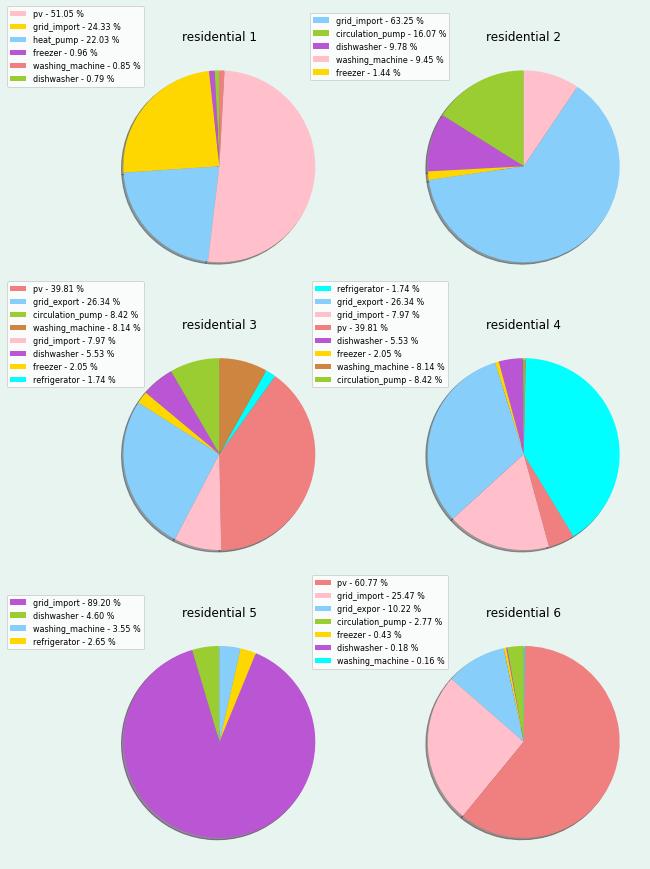

In [194]:
labels_1 = ["DE_KN_residential1_dishwasher", "DE_KN_residential1_freezer", "DE_KN_residential1_grid_import", "DE_KN_residential1_heat_pump", "DE_KN_residential1_pv", "DE_KN_residential1_washing_machine"]
pie1 = calpirechart(df, labels_1)
mylabels_1 = ["dishwasher", "freezer", "grid_import", "heat_pump", "pv", "washing_machine"]


labels_2 = ["DE_KN_residential2_circulation_pump", "DE_KN_residential2_dishwasher", "DE_KN_residential2_freezer", "DE_KN_residential2_grid_import", "DE_KN_residential2_washing_machine"]
pie2 = calpirechart(df, labels_2)
mylabels_2 = ["circulation_pump", "dishwasher", "freezer", "grid_import", "washing_machine"]

labels_3 = ["DE_KN_residential3_circulation_pump", "DE_KN_residential3_dishwasher", "DE_KN_residential3_freezer", "DE_KN_residential3_grid_export", "DE_KN_residential3_grid_import", "DE_KN_residential3_pv", "DE_KN_residential3_refrigerator", "DE_KN_residential3_washing_machine"]
pie3 = calpirechart(df, labels_3)
mylabels_3 = ["circulation_pump", "dishwasher", "freezer", "grid_export", "grid_import", "pv", "refrigerator", "washing_machine"]

labels_4 = ["DE_KN_residential4_dishwasher", "DE_KN_residential4_ev", "DE_KN_residential4_freezer", "DE_KN_residential4_grid_export", "DE_KN_residential4_grid_import", "DE_KN_residential4_heat_pump", "DE_KN_residential4_pv", "DE_KN_residential4_refrigerator", "DE_KN_residential4_washing_machine"]
pie4 = calpirechart(df, labels_4)
mylabels_4 = ["dishwasher", "ev", "freezer", "grid_export", "grid_import", "heat_pump", "pv", "refrigerator", "washing_machine"]

labels_5 = ["DE_KN_residential5_dishwasher", "DE_KN_residential5_grid_import", "DE_KN_residential5_refrigerator", "DE_KN_residential5_washing_machine"]
pie5 = calpirechart(df, labels_5)
mylabels_5 = ["dishwasher", "grid_import", "refrigerator", "washing_machine"]


labels_6 = ["DE_KN_residential6_circulation_pump", "DE_KN_residential6_dishwasher", "DE_KN_residential6_freezer", "DE_KN_residential6_grid_export", "DE_KN_residential6_grid_import", "DE_KN_residential6_pv", "DE_KN_residential6_washing_machine"]
pie6 = calpirechart(df, labels_6)
mylabels_6 = ["circulation_pump", "dishwasher", "freezer", "grid_expor", "grid_import", "pv", "washing_machine"]


#####################################

f, [[ax1, ax2],[ax3, ax4],[ax5,ax6]] = plt.subplots(3,2,figsize=(10,15), facecolor='#e8f4f0')

colors = ['yellowgreen','mediumorchid','gold','lightskyblue','pink','lightcoral', 'cyan', 'peru']


porcent1 = 100.*np.array(pie1)/np.array(pie1).sum()
patches1, texts1 = ax1.pie(np.array(pie1), colors=colors, startangle=90, shadow=True)
labels1 = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(mylabels_1, porcent1)]
sort_legend = True
if sort_legend:
    patches1, labels1, dummy1 =  zip(*sorted(zip(patches1, labels1, np.array(pie1)),
                                          key=lambda x: x[2],
                                          reverse=True))

ax1.legend(patches1, labels1, loc='center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
ax1.set_title("residential 1", loc = "center")


porcent2 = 100.*np.array(pie2)/np.array(pie2).sum()
patches2, texts2 = ax2.pie(np.array(pie2), colors=colors, startangle=90, shadow=True)
labels2 = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(mylabels_2, porcent2)]

sort_legend = True
if sort_legend:
    patches2, labels2, dummy2 =  zip(*sorted(zip(patches2, labels2, np.array(pie2)),
                                          key=lambda x: x[2],
                                          reverse=True))

ax2.legend(patches2, labels2, loc='center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
ax2.set_title("residential 2", loc = "center")

porcent3 = 100.*np.array(pie3)/np.array(pie3).sum()
patches3, texts3 = ax3.pie(np.array(pie3), colors=colors, startangle=90, shadow=True)
labels3 = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(mylabels_3, porcent3)]

sort_legend = True
if sort_legend:
    patches3, labels3, dummy3 =  zip(*sorted(zip(patches3, labels3, np.array(pie3)),
                                          key=lambda x: x[2],
                                          reverse=True))

ax3.legend(patches3, labels3, loc='center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
ax3.set_title("residential 3", loc = "center")
                         
porcent4 = 100.*np.array(pie4)/np.array(pie4).sum()
patches4, texts4 = ax4.pie(np.array(pie4), colors=colors, startangle=90, shadow=True)
labels4 = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(mylabels_3, porcent3)]

sort_legend = True
if sort_legend:
    patches4, labels4, dummy4 =  zip(*sorted(zip(patches4, labels4, np.array(pie4)),
                                          key=lambda x: x[2],
                                          reverse=True))

ax4.legend(patches4, labels4, loc='center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)   
ax4.set_title("residential 4", loc = "center")


porcent5 = 100.*np.array(pie5)/np.array(pie5).sum()
patches5, texts5 = ax5.pie(np.array(pie5), colors=colors, startangle=90, shadow=True)
labels5 = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(mylabels_5, porcent5)]

sort_legend = True
if sort_legend:
    patches5, labels5, dummy5 =  zip(*sorted(zip(patches5, labels5, np.array(pie5)),
                                          key=lambda x: x[2],
                                          reverse=True))

ax5.legend(patches5, labels5, loc='center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)   
ax5.set_title("residential 5", loc = "center")


porcent6 = 100.*np.array(pie6)/np.array(pie6).sum()
patches6, texts6 = ax6.pie(np.array(pie6), colors=colors, startangle=90, shadow=True)
labels6 = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(mylabels_6, porcent6)]

sort_legend = True
if sort_legend:
    patches6, labels6, dummy6 =  zip(*sorted(zip(patches6, labels6, np.array(pie6)),
                                          key=lambda x: x[2],
                                          reverse=True))

ax6.legend(patches6, labels6, loc='center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)   
ax6.set_title("residential 6", loc = "center")

plt.show()

From these three pie chart graphs, we could see that some comsumption may occupy a great part in one resident but does not occupy a large part in other resident.But pv indeed occupy a great part for resident 1,3,4, and 6. And grid_import occupy a large part for resident 2, and 5.

### 2. Time Series Dataset


In [17]:
df2  = pd.read_csv('./data/time_series_60min_singleindex.csv')

#### 2.1.1 Overall view

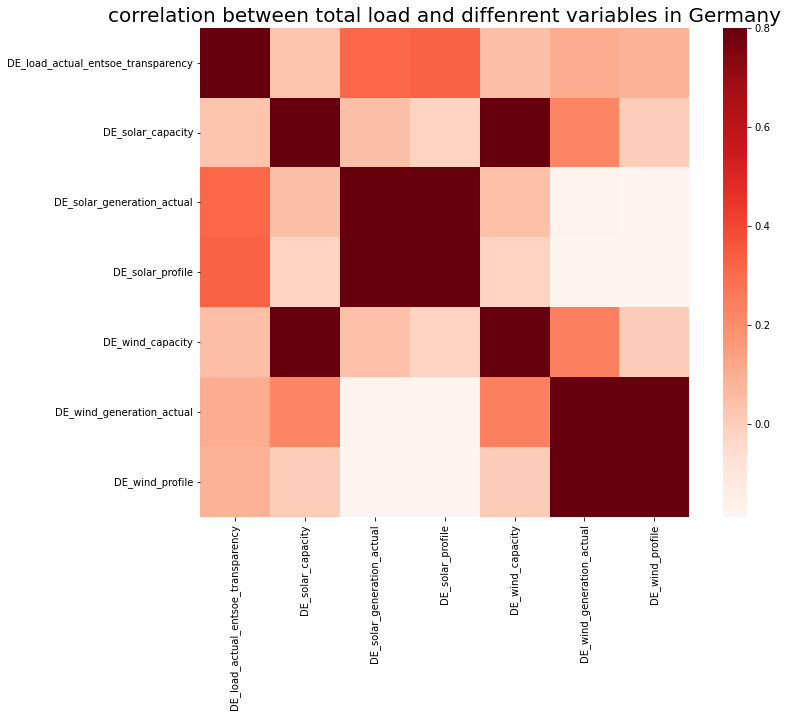

In [198]:
germany_labels_1 = ["DE_load_actual_entsoe_transparency","DE_solar_capacity", "DE_solar_generation_actual","DE_solar_profile", "DE_wind_capacity", "DE_wind_generation_actual", "DE_wind_profile"]
corrmat1 = df2[germany_labels_1].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat1, cmap='Reds',vmax=.8, square=True, ax=ax);
ax.set_title("correlation between total load and diffenrent variables in Germany", fontsize= 20);

#### 2.1.2 50hertz area


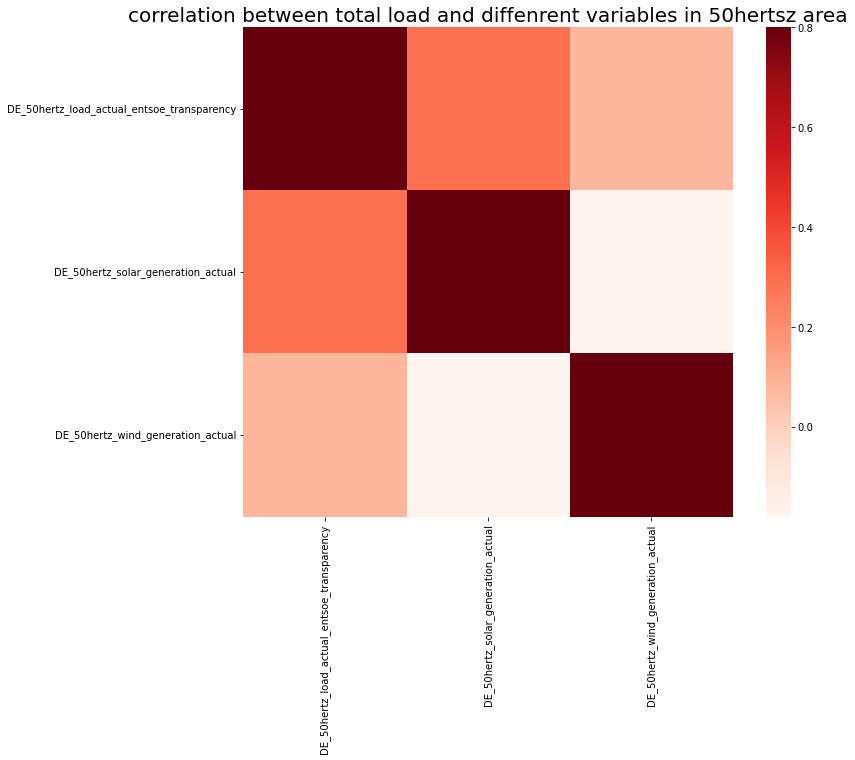

In [203]:
germany_labels_2 = ["DE_50hertz_load_actual_entsoe_transparency","DE_50hertz_solar_generation_actual", "DE_50hertz_wind_generation_actual"]
corrmat2 = df2[germany_labels_2].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat2, cmap='Reds',vmax=.8, square=True, ax=ax);
ax.set_title("correlation between total load and diffenrent variables in 50hertsz area", fontsize= 20);

#### 2.1.3 LU area

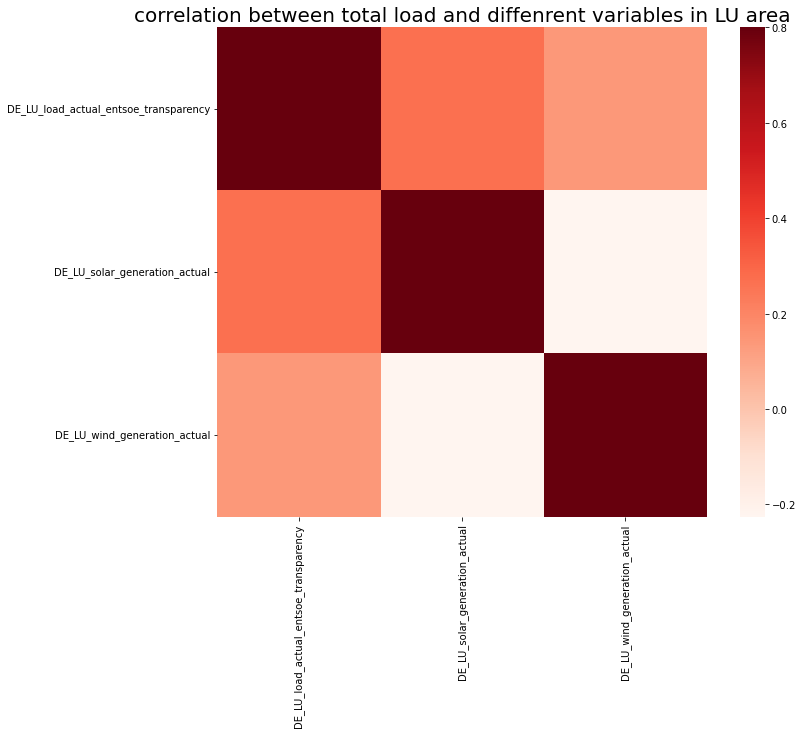

In [204]:
germany_labels_3 = ["DE_LU_load_actual_entsoe_transparency","DE_LU_solar_generation_actual", "DE_LU_wind_generation_actual"]
corrmat3 = df2[germany_labels_3].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat3, cmap='Reds',vmax=.8, square=True, ax=ax);
ax.set_title("correlation between total load and diffenrent variables in LU area", fontsize= 20);

#### 2.1.4 amprion area

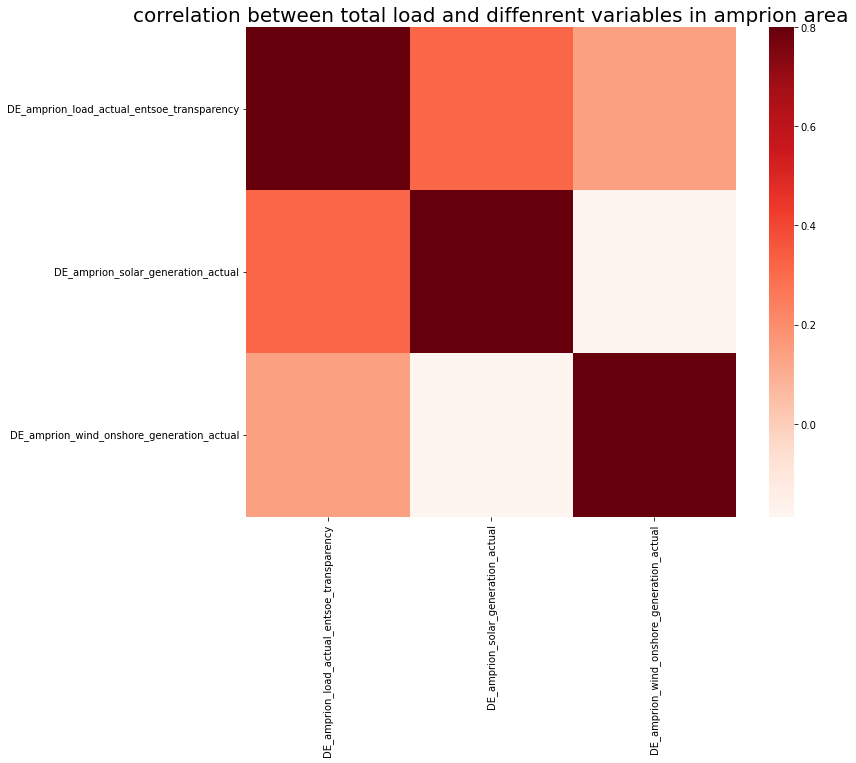

In [205]:
germany_labels_4 = ["DE_amprion_load_actual_entsoe_transparency","DE_amprion_solar_generation_actual", "DE_amprion_wind_onshore_generation_actual"]
corrmat4 = df2[germany_labels_4].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat4, cmap='Reds',vmax=.8, square=True, ax=ax);
ax.set_title("correlation between total load and diffenrent variables in amprion area", fontsize= 20);

#### 2.1.5 tenet area


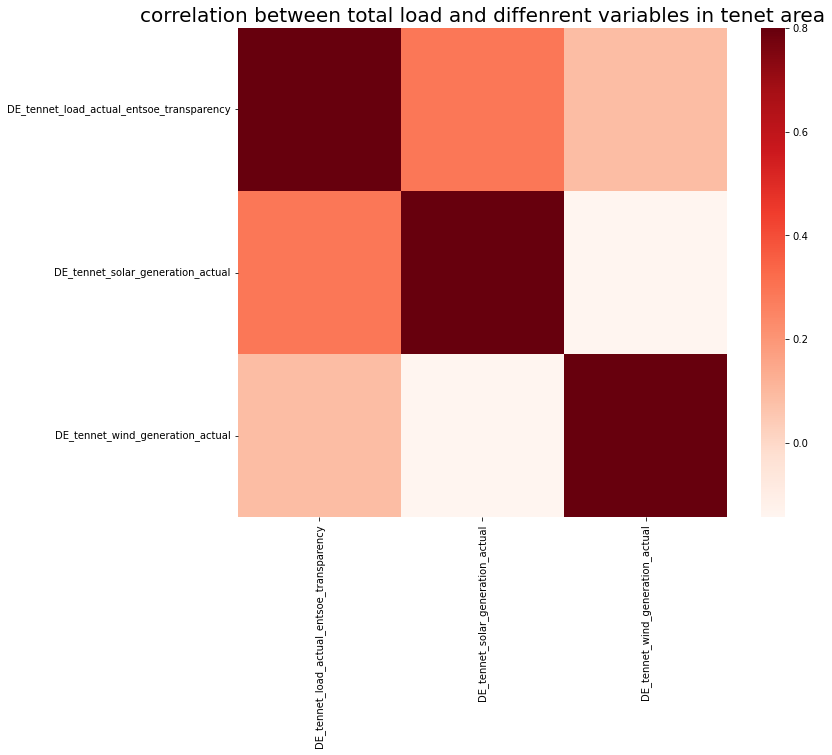

In [207]:
germany_labels_5 = ["DE_tennet_load_actual_entsoe_transparency","DE_tennet_solar_generation_actual", "DE_tennet_wind_generation_actual"]
corrmat5 = df2[germany_labels_5].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat5, cmap='Reds',vmax=.8, square=True, ax=ax);
ax.set_title("correlation between total load and diffenrent variables in tenet area", fontsize= 20);

#### 2.1.6 transnetbw area

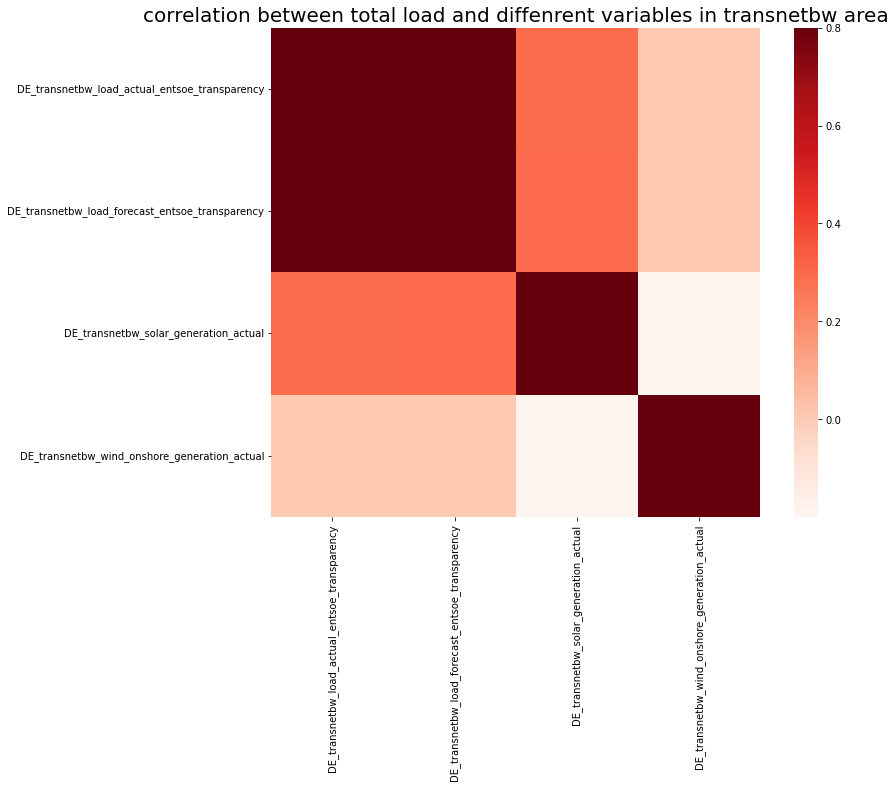

In [212]:
germany_labels_6 = ["DE_transnetbw_load_actual_entsoe_transparency","DE_transnetbw_load_forecast_entsoe_transparency", "DE_transnetbw_solar_generation_actual", "DE_transnetbw_wind_onshore_generation_actual"]
corrmat6 = df2[germany_labels_6].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat6, cmap='Reds',vmax=.8, square=True, ax=ax);
ax.set_title("correlation between total load and diffenrent variables in transnetbw area", fontsize= 20);

#### 2.2 

In [35]:
df2.shape

(50401, 304)

In [31]:
df2['Year'] = pd.to_datetime(df2.cet_cest_timestamp, format='%Y-%m-%d %H:%M:%S', utc = True).dt.year
df2['Month'] = pd.to_datetime(df2.cet_cest_timestamp, format='%Y-%m', utc = True).dt.month
df2['year_month'] = str(df2["Month"]) + str(df2["Year"])
df2.head()

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency,Date,Year,Month,year_month
0,2014-12-31T23:00:00Z,2015-01-01 00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2014,2014,12,0 12\n1 1\n2 1\n3 ...
1,2015-01-01T00:00:00Z,2015-01-01 01:00:00+01:00,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2015,2015,1,0 12\n1 1\n2 1\n3 ...
2,2015-01-01T01:00:00Z,2015-01-01 02:00:00+01:00,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,...,2728.0,2860.0,3.8,NaN,NaN,NaN,2015,2015,1,0 12\n1 1\n2 1\n3 ...
3,2015-01-01T02:00:00Z,2015-01-01 03:00:00+01:00,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,...,2626.0,2810.0,3.8,NaN,NaN,NaN,2015,2015,1,0 12\n1 1\n2 1\n3 ...
4,2015-01-01T03:00:00Z,2015-01-01 04:00:00+01:00,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,...,2618.0,2780.0,3.8,NaN,NaN,NaN,2015,2015,1,0 12\n1 1\n2 1\n3 ...


In [47]:
df2_drop = df2.copy()
df2_drop.dropna(subset=['DE_load_actual_entsoe_transparency'])
df2_drop = df2_drop.iloc[1: , :]
df2_drop.head()

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency,Date,Year,Month,year_month
1,2015-01-01T00:00:00Z,2015-01-01 01:00:00+01:00,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2015,2015,1,0 12\n1 1\n2 1\n3 ...
2,2015-01-01T01:00:00Z,2015-01-01 02:00:00+01:00,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,...,2728.0,2860.0,3.8,NaN,NaN,NaN,2015,2015,1,0 12\n1 1\n2 1\n3 ...
3,2015-01-01T02:00:00Z,2015-01-01 03:00:00+01:00,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,...,2626.0,2810.0,3.8,NaN,NaN,NaN,2015,2015,1,0 12\n1 1\n2 1\n3 ...
4,2015-01-01T03:00:00Z,2015-01-01 04:00:00+01:00,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,...,2618.0,2780.0,3.8,NaN,NaN,NaN,2015,2015,1,0 12\n1 1\n2 1\n3 ...
5,2015-01-01T04:00:00Z,2015-01-01 05:00:00+01:00,5309.0,6609.0,35.0,NaN,64.0,8487.0,8806.0,NaN,...,2626.0,2790.0,3.8,NaN,NaN,NaN,2015,2015,1,0 12\n1 1\n2 1\n3 ...


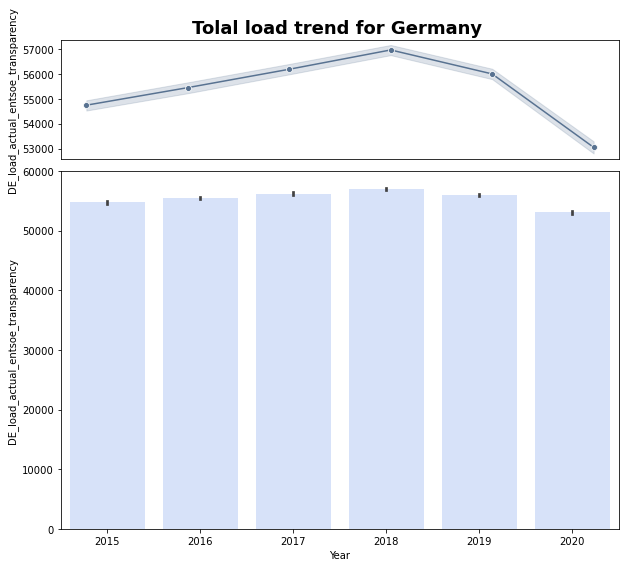

In [51]:
fig,ax=plt.subplots(2,1,figsize=(10, 9),gridspec_kw={'height_ratios': [1, 3]})
sns.lineplot(data=df2_drop,x='Year',y='DE_load_actual_entsoe_transparency',linewidth = 1.5,color='#587291',marker='o',ax=ax[0])
sns.barplot(x='Year',y='DE_load_actual_entsoe_transparency', data=df2_drop,color='#C6D8FF',alpha=0.8,ax=ax[1])
ax[0].get_xaxis().set_visible(False)
plt.subplots_adjust(hspace = .05)
ax[0].set_title("Tolal load trend for Germany ", weight = 'bold', fontsize=18)
plt.show()